In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

2024-03-23 17:02:28.085821: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 17:02:28.175288: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 17:02:28.533012: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 17:02:29.611201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv('data/manual_30min_norm.csv')

data.head()

,TIME,FM1,PE1,PE2,PE3,PE4,TP1,EPOCH
0,16/09/2013 00:00,1.000000,0.538462,0.538462,0.123077,0.123077,0.142857,1379289600
1,16/09/2013 00:30,0.999475,0.538416,0.538416,0.123077,0.122985,0.143787,1379291400
2,16/09/2013 01:00,0.998950,0.538370,0.538370,0.123077,0.122894,0.144717,1379293200
3,16/09/2013 01:30,0.998424,0.538324,0.538324,0.123077,0.122802,0.145647,1379295000
4,16/09/2013 02:00,0.997899,0.538278,0.538278,0.123077,0.122711,0.146577,1379296800


In [3]:
#Отчистка данных

data['TIME'] = pd.to_datetime(data['TIME'])

data['TIME'] = (data['TIME'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
data.head()

/tmp/ipykernel_33069/2618172530.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['TIME'] = pd.to_datetime(data['TIME'])


,TIME,FM1,PE1,PE2,PE3,PE4,TP1,EPOCH
0,1379289600,1.000000,0.538462,0.538462,0.123077,0.123077,0.142857,1379289600
1,1379291400,0.999475,0.538416,0.538416,0.123077,0.122985,0.143787,1379291400
2,1379293200,0.998950,0.538370,0.538370,0.123077,0.122894,0.144717,1379293200
3,1379295000,0.998424,0.538324,0.538324,0.123077,0.122802,0.145647,1379295000
4,1379296800,0.997899,0.538278,0.538278,0.123077,0.122711,0.146577,1379296800


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_length = int(len(scaled_data) * 0.7)

X = scaled_data[:, 1:]
y = scaled_data[:, 0]

In [5]:
# Разделение данных на обучающую и тестовую выборки
train_X = X[0:train_length]
train_y = y[0:train_length]
test_X = X[train_length:]
test_y = y[train_length:]

In [6]:
# Создание модели LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
model.fit(train_X, train_y, epochs=20, batch_size=1, verbose=2)

# Предсказание
predictions = model.predict(test_X)

Epoch 1/20


/home/alt/micromamba/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77448/77448 - 227s - 3ms/step - loss: 2.4306e-04
Epoch 2/20
77448/77448 - 226s - 3ms/step - loss: 3.4860e-06
Epoch 3/20
77448/77448 - 227s - 3ms/step - loss: 2.1218e-06
Epoch 4/20
77448/77448 - 232s - 3ms/step - loss: 1.5881e-06
Epoch 5/20
77448/77448 - 232s - 3ms/step - loss: 1.3884e-06
Epoch 6/20
77448/77448 - 230s - 3ms/step - loss: 1.3088e-06
Epoch 7/20
77448/77448 - 232s - 3ms/step - loss: 1.1904e-06
Epoch 8/20
77448/77448 - 233s - 3ms/step - loss: 1.1371e-06
Epoch 9/20
77448/77448 - 231s - 3ms/step - loss: 1.0619e-06
Epoch 10/20
77448/77448 - 258s - 3ms/step - loss: 9.6771e-07
Epoch 11/20
77448/77448 - 231s - 3ms/step - loss: 8.5247e-07
Epoch 12/20
77448/77448 - 231s - 3ms/step - loss: 8.2883e-07
Epoch 13/20
77448/77448 - 229s - 3ms/step - loss: 8.0804e-07
Epoch 14/20
77448/77448 - 231s - 3ms/step - loss: 7.7684e-07
Epoch 15/20
77448/77448 - 230s - 3ms/step - loss: 7.2992e-07
Epoch 16/20
77448/77448 - 261s - 3ms/step - loss: 7.3388e-07
Epoch 17/20
77448/77448 - 231s - 3ms/step - 

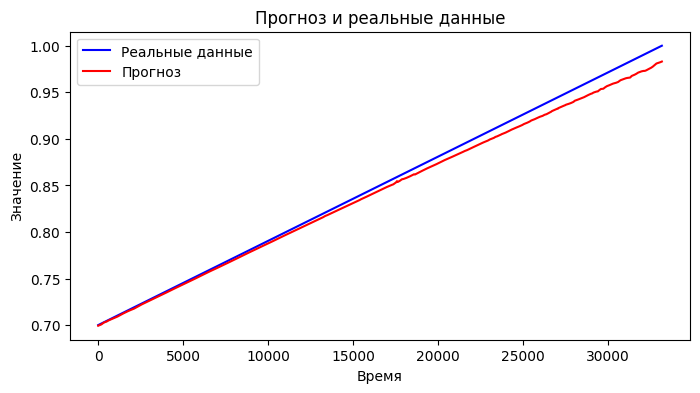

In [7]:
plt.figure(figsize=(8,4))
plt.plot(test_y, color='blue', label='Реальные данные')
plt.plot(predictions, color='red', label='Прогноз')
plt.title('Прогноз и реальные данные')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()